#### Large RAM is required to load the larger models. Running on GPU can optimize inference speed.

In [1]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="oM8qjezJVTxKQnGTuBzP")
project = rf.workspace("abdelaadimkhriss").project("ocean-plastics-waste-detection-float-plastics")
version = project.version(8)
dataset = version.download("yolov11")


  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.10.0.84-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.9 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.64
    Uninstalling opencv-python-headless-4.5.5.64:
      Successfully uninstalled opencv-python-headless-4.5.5.64
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
salesforce-lavis 1.0.2 requires opencv-python-headless==4.5.5.64, but you have opencv-python-headless 4.10.0.84 which is incompatible.
loading Roboflow workspace...
loading Roboflow project...


In [2]:
import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install salesforce-lavis

Running in Colab.
  Using cached opencv_python_headless-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached opencv_python_headless-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.8 MB)
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.84
    Uninstalling opencv-python-headless-4.10.0.84:
      Successfully uninstalled opencv-python-headless-4.10.0.84
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.54 requires opencv-python-headless==4.10.0.84, but you have opencv-python-headless 4.5.5.64 which is incompatible.
albumentations 2.0.4 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-headless 4.5.5.64 which is incompatible.
albucore 0.0.23 requires opencv-python-headless>=4.9.0.80, but you have opencv-python-

In [3]:
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess

`torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
`torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.


#### Load an example image

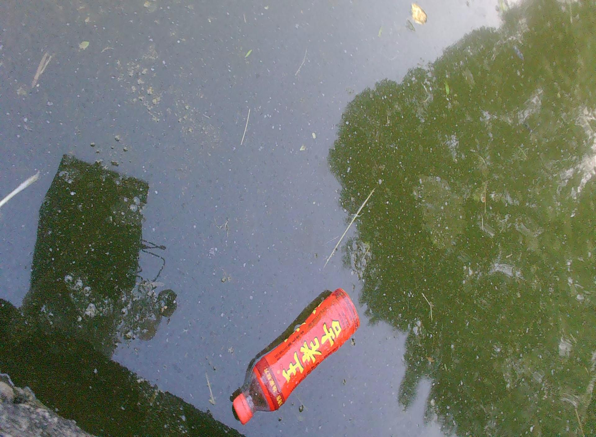

In [6]:
img_url = '/content/Ocean-Plastics-Waste-Detection---Float-Plastics-8/test/images/0059_jpg.rf.52f86f18bdf7b494cdb44c2494606e76.jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image.resize((596, 437)))

In [7]:
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

#### Load pretrained/finetuned BLIP2 captioning model

In [8]:
# we associate a model with its preprocessors to make it easier for inference.
model, vis_processors, _ = load_model_and_preprocess(
    name="blip2_t5", model_type="pretrain_flant5xxl", is_eval=True, device=device
)

# Other available models:
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="pretrain_opt2.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="pretrain_opt6.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt2.7b", is_eval=True, device=device
# )
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_opt", model_type="caption_coco_opt6.7b", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="pretrain_flant5xl", is_eval=True, device=device
# )
#
# model, vis_processors, _ = load_model_and_preprocess(
#     name="blip2_t5", model_type="caption_coco_flant5xl", is_eval=True, device=device
# )

vis_processors.keys()

`resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.

The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.89G/1.89G [01:25<00:00, 23.6MB/s]
You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/674 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/9.45G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/9.60G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/9.96G [00:00<?, ?B/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00005-of-00005.safetensors:   0%|          | 0.00/6.06G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

100%|██████████| 413M/413M [00:19<00:00, 22.5MB/s]
You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


dict_keys(['train', 'eval'])

#### prepare the image as model input using the associated processors

In [9]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

#### generate caption using beam search

In [10]:
model.generate({"image": image})

`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


['a bottle is floating in a body of water']

#### generate multiple captions using nucleus sampling

In [11]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a bottle is floating in a body of water',
 'a can of soda is floating in a body of water',
 'a can of soda is floating in a body of water']

#### instructed zero-shot vision-to-language generation

In [13]:
model.generate({"image": image, "prompt": "Question: which type of plastic is this and its impact on ocean? Answer:"})

['polystyrene (styrofoam)']

In [14]:
model.generate({"image": image, "prompt": "Question: what is impact of plastic found in this image if any in ocean? Answer:"})

['plastic is a non-biodegradable, non-degradable, non-biodegradable, non-biodegradable']

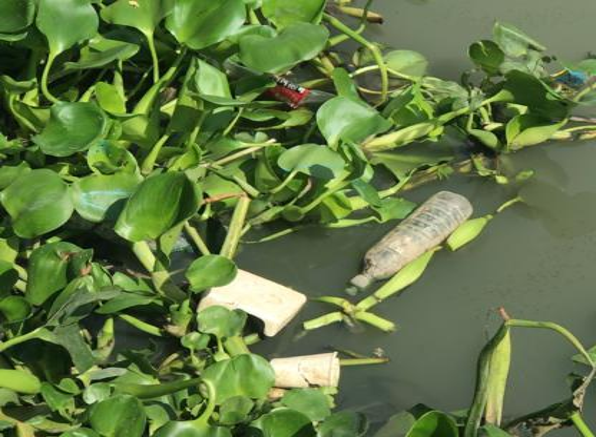

In [16]:
img_url = '/content/Ocean-Plastics-Waste-Detection---Float-Plastics-8/test/images/r104_PNG_jpg.rf.e55cdbc479143e05d5fa483c0e56419c.jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image.resize((596, 437)))

In [17]:
# due to the non-determinstic nature of necleus sampling, you may get different captions.
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

['a plastic bottle is floating in a body of water',
 'a bottle is floating in a body of water',
 'a lot of plants in the water']

In [18]:
model.generate({"image": image, "prompt": "Question: what is impact of plastic found in this image if any in ocean? Answer:"})

['plastic is a non biodegradable, non biodegradable, non biodegradable, non biodegradable, non bio']

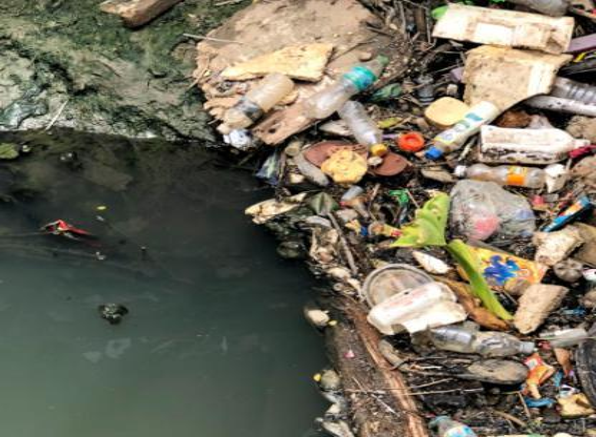

['a river filled with trash and garbage',
 'a river filled with trash and garbage',
 'a river filled with trash and garbage']

In [19]:
img_url = '/content/Ocean-Plastics-Waste-Detection---Float-Plastics-8/test/images/r470_PNG_jpg.rf.5f5d7e39badd19616ce79262fd625a12.jpg'

# Open the image correctly
raw_image = Image.open(img_url).convert('RGB')

# Resize and display the image
display(raw_image.resize((596, 437)))
# due to the non-determinstic nature of necleus sampling, you may get different captions.
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
model.generate({"image": image}, use_nucleus_sampling=True, num_captions=3)

In [20]:
model.generate({"image": image, "prompt": "Question: what is impact of plastic found in this image if any in ocean? Answer:"})

['plastic in the ocean is a major threat to marine life']